# SQL ANALYSIS OF EUROPEAN FOOTBALL SQLITE DATABASE WITH SQLALCHEMY AND PYTHON

## Load Libraries and connect to the DB

In [1]:
import sqlalchemy
from sqlalchemy import create_engine
import pandas as pd

In [2]:
engine=create_engine('sqlite:///C:/Users/mifab/Documents/Git/Python_DS_Projects/SQL/sports_europe.sqlite')

In [3]:
connection=engine.connect()

In [4]:
engine.table_names()

<ipython-input-4-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['Country',
 'League',
 'Match',
 'Player',
 'Player_Attributes',
 'Team',
 'Team_Attributes',
 'sqlite_sequence']

## Database Schema

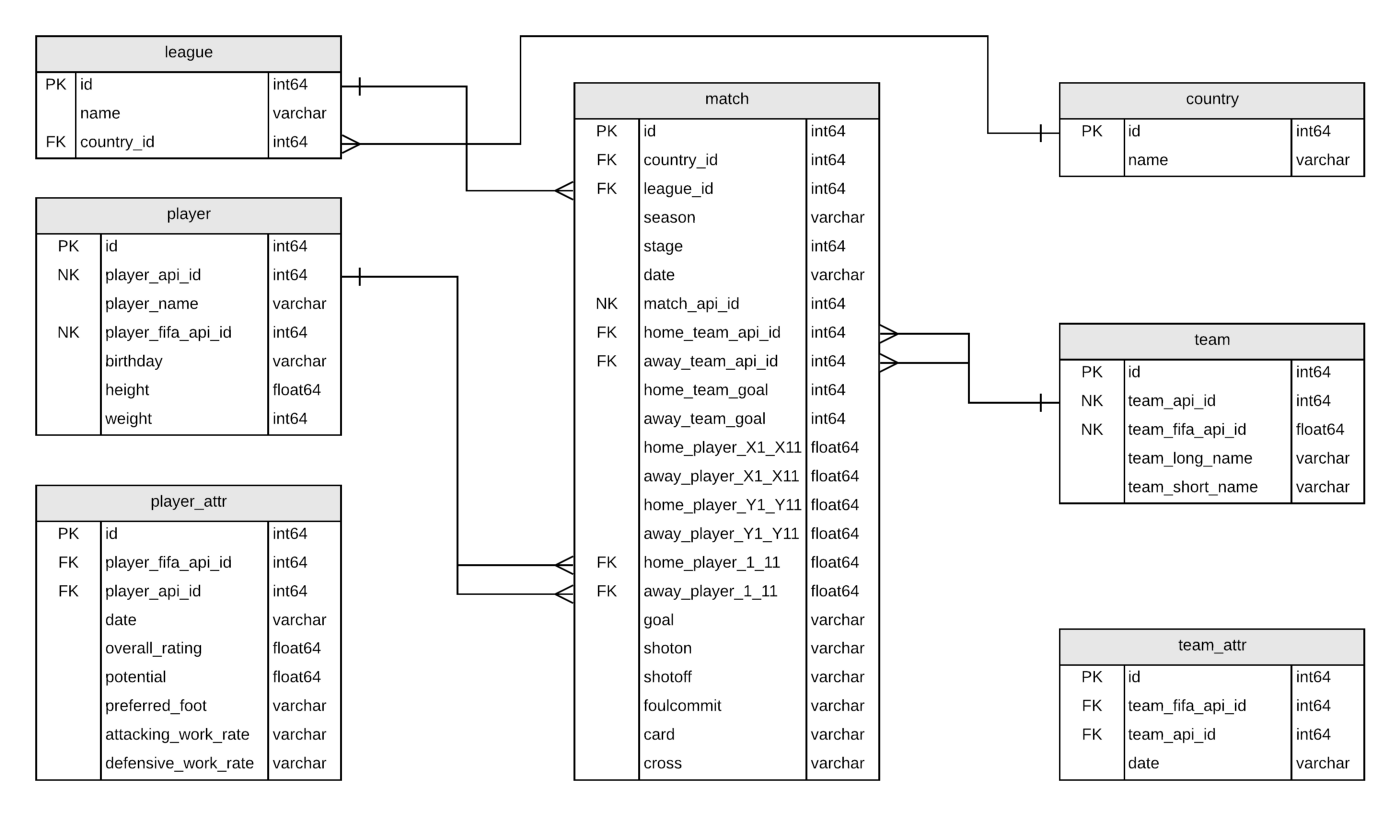

## What players can head the highest balls?

In [5]:
rs=engine.execute('''SELECT player_name AS 'name', jumping AS 'jumping_height(cm)', height AS 'height(cm)', height+jumping AS 'max_height' 
                    FROM Player JOIN Player_Attributes ON Player.id=Player_Attributes.id 
                    ORDER BY max_height DESC LIMIT 20''')
height_list=pd.DataFrame(rs.fetchall())
height_list.columns=rs.keys()
print(height_list)

                           name  jumping_height(cm)  height(cm)  max_height
0                  Enes Sipovic                  92      198.12      290.12
1                   Warner Hahn                  92      198.12      290.12
2               Wayne Hennessey                  92      198.12      290.12
3             Stefan Maierhofer                  86      203.20      289.20
4                Enoch Showunmi                  90      195.58      285.58
5                     Joe Lewis                  87      198.12      285.12
6   Miguel da Silva Jorge Bruno                  89      195.58      284.58
7                 Paolo Acerbis                  81      203.20      284.20
8                    Mamadou Ba                  85      198.12      283.12
9                  Peter Kovacs                  85      198.12      283.12
10               Anssi Jaakkola                  90      193.04      283.04
11                   Eli Babalj                  90      193.04      283.04
12          

## Are the tallest players the highest jumpers?

In [6]:
rs=engine.execute('''SELECT player_name AS 'name', jumping AS 'jumping_height(cm)', height AS 'height(cm)', height+jumping AS 'max_height' 
                    FROM Player JOIN Player_Attributes ON Player.id=Player_Attributes.id 
                    ORDER BY jumping DESC LIMIT 20''')
jump_list=pd.DataFrame(rs.fetchall())
jump_list.columns=rs.keys()
print(jump_list)

                 name  jumping_height(cm)  height(cm)  max_height
0     Dominik Kumbela                  94      172.72      266.72
1         Dominik Kun                  94      172.72      266.72
2       Enar Jaeaeger                  93      177.80      270.80
3     Enaut Zubikarai                  93      185.42      278.42
4           Enca Fati                  93      180.34      273.34
5        Enda Stevens                  93      182.88      275.88
6       Endogan Adili                  93      170.18      263.18
7        Eneko Boveda                  93      180.34      273.34
8   Eneko Satrustegui                  93      182.88      275.88
9        Enes Fermino                  93      182.88      275.88
10   Emmanuel Riviere                  92      182.88      274.88
11  Emmerik de Vriese                  92      180.34      272.34
12     Emmerson Boyce                  92      182.88      274.88
13     Emre Belozoglu                  92      170.18      262.18
14        

Actually, average height players (170-185cm) jump the highest distance

## What are the latest 10 matches played in Germany's League?

In [7]:
rs=engine.execute('''SELECT Match.id,Country.name AS country_name,League.name AS league_name,Match.season,Match.stage,Match.date,HomeTeam.team_long_name AS home_team,
                    Match.home_team_goal,AwayTeam.team_long_name AS away_team,Match.away_team_goal
                    FROM Match 
                    JOIN Country ON Country.id = Match.country_id 
                    JOIN League ON League.id = Match.league_id 
                    JOIN Team AS HomeTeam ON HomeTeam.team_api_id = Match.home_team_api_id
                    JOIN Team AS AwayTeam ON AwayTeam.team_api_id = Match.away_team_api_id 
                    WHERE country_name = 'Germany' ORDER BY date LIMIT 10''')
matches_list=pd.DataFrame(rs.fetchall())
matches_list.columns=rs.keys()
print(matches_list)

     id country_name            league_name     season  stage  \
0  7809      Germany  Germany 1. Bundesliga  2008/2009      1   
1  7810      Germany  Germany 1. Bundesliga  2008/2009      1   
2  7811      Germany  Germany 1. Bundesliga  2008/2009      1   
3  7812      Germany  Germany 1. Bundesliga  2008/2009      1   
4  7814      Germany  Germany 1. Bundesliga  2008/2009      1   
5  7815      Germany  Germany 1. Bundesliga  2008/2009      1   
6  7817      Germany  Germany 1. Bundesliga  2008/2009      1   
7  7813      Germany  Germany 1. Bundesliga  2008/2009      1   
8  7816      Germany  Germany 1. Bundesliga  2008/2009      1   
9  7915      Germany  Germany 1. Bundesliga  2008/2009      2   

                  date                 home_team  home_team_goal  \
0  2008-08-15 00:00:00          FC Bayern Munich               2   
1  2008-08-16 00:00:00       Bayer 04 Leverkusen               2   
2  2008-08-16 00:00:00             FC Schalke 04               3   
3  2008-08-1

There were 3 ties, 4 win from the away team and 3 wins form the home teams.

##  What are the top 3 Rank Scoring teams in Germany League per season?

In [8]:
rs=engine.execute('''
                    SELECT * FROM
                    (SELECT  Match.season, 
                    HomeTeam.team_long_name AS Team, 
                    SUM(Match.home_team_goal) AS Total_Goals,
                    ROW_NUMBER() OVER(PARTITION BY season ORDER BY SUM(Match.home_team_goal) DESC) as 'rank_per_year'
                    FROM Match
                    JOIN League ON League.id = Match.league_id 
                    JOIN Team AS HomeTeam ON HomeTeam.team_api_id = Match.home_team_api_id
                    WHERE League.name = 'Germany 1. Bundesliga'
                    GROUP BY Team, season
                    ) t
                    WHERE t.rank_per_year <= 3
                    ORDER BY t.season DESC, t.Total_Goals DESC, t.Team ASC                    
                    ;''')
rank_score_list=pd.DataFrame(rs.fetchall())
rank_score_list.columns=rs.keys()
pd.options.display.max_rows = 150
print(rank_score_list)

       season                      Team  Total_Goals  rank_per_year
0   2015/2016          FC Bayern Munich           51              1
1   2015/2016         Borussia Dortmund           49              2
2   2015/2016  Borussia Mönchengladbach           42              3
3   2014/2015          FC Bayern Munich           46              1
4   2014/2015       Bayer 04 Leverkusen           39              2
5   2014/2015             VfL Wolfsburg           38              3
6   2013/2014          FC Bayern Munich           48              1
7   2013/2014       TSG 1899 Hoffenheim           43              2
8   2013/2014         Borussia Dortmund           41              3
9   2012/2013          FC Bayern Munich           56              1
10  2012/2013         Borussia Dortmund           40              2
11  2012/2013       Bayer 04 Leverkusen           36              3
12  2011/2012          FC Bayern Munich           49              1
13  2011/2012             FC Schalke 04         

FC Bayern Munich is consistently in the top 3 after 2010.

## What is the overall performance of the German League?

In [9]:
rs=engine.execute('''SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Germany')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;''')
german_performance_list=pd.DataFrame(rs.fetchall())
german_performance_list.columns=rs.keys()
print(german_performance_list)

  country_name            league_name     season  number_of_stages  \
0      Germany  Germany 1. Bundesliga  2015/2016                34   
1      Germany  Germany 1. Bundesliga  2014/2015                34   
2      Germany  Germany 1. Bundesliga  2013/2014                34   
3      Germany  Germany 1. Bundesliga  2012/2013                34   
4      Germany  Germany 1. Bundesliga  2011/2012                34   
5      Germany  Germany 1. Bundesliga  2010/2011                34   
6      Germany  Germany 1. Bundesliga  2009/2010                34   
7      Germany  Germany 1. Bundesliga  2008/2009                34   

   number_of_teams  avg_home_team_scors  avg_away_team_goals  avg_goal_dif  \
0               18             1.565359             1.264706      0.300654   
1               18             1.588235             1.166667      0.421569   
2               18             1.748366             1.411765      0.336601   
3               18             1.591503             1.343

The most goals scored in the German League was in the year 2013.

## Does the preferred foot impact the rating?

In [10]:
rs=engine.execute('''SELECT Player_Attributes.preferred_foot,
                  COUNT(Player_Attributes.preferred_foot) * 100.0 / SUM(COUNT(Player_Attributes.preferred_foot)) OVER () AS Percentage,
                  AVG(Player_Attributes.overall_rating) AS 'averge rating',
                  MAX(Player_Attributes.overall_rating) AS 'max rating',
                  MIN(Player_Attributes.overall_rating) AS 'min rating'
                  FROM Player_Attributes
                  WHERE Player_Attributes.preferred_foot != 'None'
                  GROUP BY preferred_foot''')
foot_rate_list=pd.DataFrame(rs.fetchall())
foot_rate_list.columns=rs.keys()
print(foot_rate_list)

  preferred_foot  Percentage  averge rating  max rating  min rating
0           left   24.425309      68.626182          94          35
1          right   75.574691      68.591558          93          33


The rating of the player does not seem to be affected by the player's preference

## What is Messi's performance per season compared to the average player?

In [11]:
rs=engine.execute('''SELECT strftime('%Y',date) AS 'year', player_name, overall_rating, free_kick_accuracy, sprint_speed, agility, shot_power 
                  FROM Player_Attributes
                  JOIN Player ON Player.player_api_id=Player_Attributes.player_api_id
                  WHERE player_name= 'Lionel Messi' 
                  GROUP BY strftime('%Y',date)
                  
                  UNION 
                  
                  SELECT strftime('%Y',date) AS 'year', 'average', AVG(overall_rating),  AVG(free_kick_accuracy),  AVG(sprint_speed),  AVG(agility),  AVG(shot_power) 
                  FROM Player_Attributes
                  JOIN Player ON Player.player_api_id=Player_Attributes.player_api_id
                   WHERE player_name!= 'Lionel Messi' AND date<2016
                   GROUP BY strftime('%Y',date)
                  ;''')
messi_list=pd.DataFrame(rs.fetchall())
messi_list.columns=rs.keys()
print(messi_list)

    year   player_name  overall_rating  free_kick_accuracy  sprint_speed  \
0   2007  Lionel Messi       86.000000           70.000000     95.000000   
1   2007       average       64.553247           47.954805     66.407143   
2   2008  Lionel Messi       90.000000           70.000000     95.000000   
3   2008       average       66.984469           47.269888     67.535807   
4   2009  Lionel Messi       90.000000           74.000000     93.000000   
5   2009       average       68.231865           47.936137     68.798620   
6   2010  Lionel Messi       90.000000           82.000000     88.000000   
7   2010       average       68.168007           48.042325     68.855651   
8   2011  Lionel Messi       94.000000           82.000000     92.000000   
9   2011       average       68.468410           47.981531     67.762744   
10  2012  Lionel Messi       94.000000           82.000000     92.000000   
11  2012       average       68.532045           48.395627     67.081676   
12  2013  Li

Across all years Messi has greatly surpassed the average player.

## Have the teams' speed of play been getting faster over the years?

In [12]:
rs=engine.execute('''SELECT buildUpPlaySpeedClass, 
                    strftime('%Y',date) AS 'year',
                    COUNT(buildUpPlaySpeedClass) AS 'Number of Teams'
                    FROM Team_Attributes
                    GROUP BY year, buildUpPlaySpeedClass
                    ORDER BY buildUpPlaySpeedClass ASC, year DESC
                  ;''')
speed_list=pd.DataFrame(rs.fetchall())
speed_list.columns=rs.keys()
print(speed_list)

   buildUpPlaySpeedClass  year  Number of Teams
0               Balanced  2015              220
1               Balanced  2014              210
2               Balanced  2013              209
3               Balanced  2012              208
4               Balanced  2011              207
5               Balanced  2010              130
6                   Fast  2015               21
7                   Fast  2014               29
8                   Fast  2013               24
9                   Fast  2012               20
10                  Fast  2011               28
11                  Fast  2010               50
12                  Slow  2015                4
13                  Slow  2014                5
14                  Slow  2013                9
15                  Slow  2012               14
16                  Slow  2011                9
17                  Slow  2010               61


They have not gotten faster or slower, but have gone for a more balanced speed instead.

## Top 5 leagues per season with most yellow and red cards

In [38]:
rs=engine.execute(''' SELECT * FROM
                    (SELECT league.name AS league_name, season,
                    SUM(CASE WHEN card LIKE '%>y<%' THEN 1 ELSE 0 END) AS 'yellow',
                    SUM(CASE WHEN card LIKE '%>r<%' THEN 1 ELSE 0 END) AS 'red',
                    COUNT(match.id) AS 'n_matches',
                    ROW_NUMBER() OVER(PARTITION BY season ORDER BY  SUM(CASE WHEN card LIKE '%>y<%' THEN 1 ELSE 0 END) DESC ) as 'rank_per_year'
                    FROM match
                    JOIN league on match.league_id=league.id
                    GROUP BY league_name, season
                    ) t
                    WHERE t.rank_per_year <= 5
                    ORDER BY t.season DESC        
                    ;''')
messi_list=pd.DataFrame(rs.fetchall())
messi_list.columns=rs.keys()
print(messi_list)

                league_name     season  yellow  red  n_matches  rank_per_year
0             Italy Serie A  2015/2016     379   42        380              1
1           Spain LIGA BBVA  2015/2016     378   32        380              2
2            France Ligue 1  2015/2016     371   67        380              3
3    England Premier League  2015/2016     358   32        380              4
4     Germany 1. Bundesliga  2015/2016     293   15        306              5
5             Italy Serie A  2014/2015     379   42        379              1
6           Spain LIGA BBVA  2014/2015     376   38        380              2
7            France Ligue 1  2014/2015     369   49        380              3
8    England Premier League  2014/2015     368   35        380              4
9     Germany 1. Bundesliga  2014/2015     291   25        306              5
10            Italy Serie A  2013/2014     376   40        380              1
11          Spain LIGA BBVA  2013/2014     376   45        380  

Italy and spain consistently in the top 5 each year, followed by England, France and Germany.\
Scotland and Netherlands have significantly less cards than the aformentioned ones, despite having  a large amount of matches.